In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
gaia = pd.read_csv('data/confirmed_mydata.csv',
            comment='#')
tess = pd.read_csv('data/confirmed_tess.csv',
            comment='#')

In [33]:
gaia_num = gaia.loc[:,['pl_orbper','pl_orbsmax','pl_orbeccen','pl_orbincl','pl_bmassj','pl_radj']]
gaia.isna().sum()
gaia_new = gaia.loc[:,['pl_orbper','pl_bmassj','pl_radj']]
gaia_np = gaia_new.to_numpy()

In [42]:
#standardize gaia data
scaler = StandardScaler()
scaler.fit(gaia_new)
gaia_np_std = scaler.transform(gaia_new)

In [39]:
gaia["pl_discmethod"].unique()

array(['Transit', 'Orbital Brightness Modulation', 'Radial Velocity',
       'Transit Timing Variations'], dtype=object)

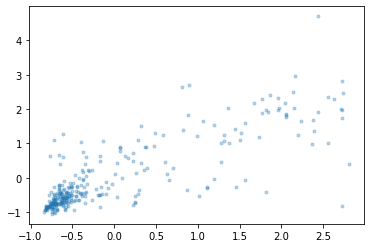

In [43]:
plt.plot(gaia_np_std[:,1], gaia_np_std[:,2], '.', alpha=0.3)

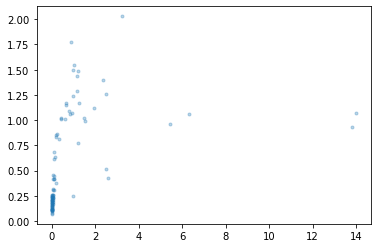

In [15]:
plt.plot(tess['pl_bmassj'], tess['pl_radj'], '.', alpha=0.3)


In [53]:
# unsupervised learning - Kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(gaia_np_std)

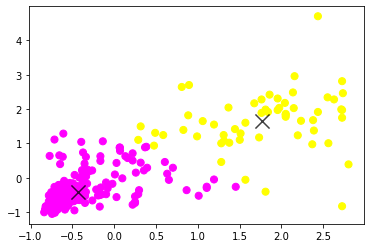

In [54]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot and color the points according to their label
plt.scatter(gaia_np_std[:,1], gaia_np_std[:,2], c=labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(centers[:, 1], centers[:, 2], c='black', marker="x", s=200, alpha=0.75)